# log$\rho$ - logT diagram for model solar-metallicity ZAMS stars

Figure 6.8 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of the log$\rho$-logT plane for the interiors of a grid of solar metallicity zero-age main sequence stars
computed for this book using MESA.  The stars have masses of 0.3, 1, 3, 10, and 30 M<sub>sun</sub>.

The models are in the `ZAMS/` folder with these notebooks in raw ASCII format output by MESA.  We use
them for a number of the plots in Chapter 6.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Stellar Models

The models are solar-metallicity ZAMs stars with masses of 0.3, 1, 3, 10, and 30 M<sub>sun</sub>, stored in
the raw ASCII format used by MESA. We read these files using pandas.

For this figure we need 2 data columns:
 * logRho = log10 of density
 * logT = log10 of temperature
 
Files are stored in the `ZAMS/` folder, with names like "`profile_m0.3_zams.txt` for an 0.3M<sub>sun</sub>
model.


In [3]:
dataDir = 'ZAMS'

massList = ['0.3','1','3','10','30']
lineType = [(0,(1,1)),(0,()),(0,(10,2)),(0, (3, 5, 1, 5)),(0,(4,2))]

# initialize empty dictionaries with the data arrays to plot

rho = {} # density in g/cm^3
temp = {} # temperature in K

# Load the arrays 

for m in massList:
    modelFile = f'{dataDir}/profile_m{m}_zams.txt'
    data = pd.read_csv(modelFile,sep=r'\s+',header=4)
    rho[m] = 10.0**np.array(data['logRho'])
    temp[m] = 10.0**np.array(data['logT'])


## Equation of Stage Boundaries

Three equation of state boundaries to plot in the $\rho-$T plane:
 * radiation and ideal gas pressure
 * ideal gas and non-relativistic degeneracy pressure
 
The critical density between radiation and ideal gas pressure for ionized hydrogen is Equation 3.81:

$\rho_\textrm{r-i}(T) = 0.0455\,\textrm{g cm}^{-3}\left( \frac{T}{10^7\,\textrm{K}} \right)^3$

The critical density between ideal gas and non-relativistic degeneracy pressure for ionized hydrogen is 
Equation 3.79:

$\rho_\textrm{i-d}(T) = 2130\,\textrm{g cm}^{-3} \left( \frac{T}{10^7\,\textrm{K}} \right)^{3/2}$


In [4]:
# Critical density between radiation and ideal gas pressure

tempRI = 10.0**np.linspace(4.3,7.6,101)
rhoRI = 0.04550*(tempRI/1.0e7)**3

# Critical density between ideal gas and non-relativistic degeneracy pressure

tempID = 10.0**np.linspace(3.2,7.0,101) 
rhoID = 2130.0*(tempID/1.0e7)**1.5


## Figure 6.8

Plot each star's rho-T track, bracket with the Prad=Pgas and Pgas=Pdeg boundaries (see Figure 3.3 from
Chapter 3)

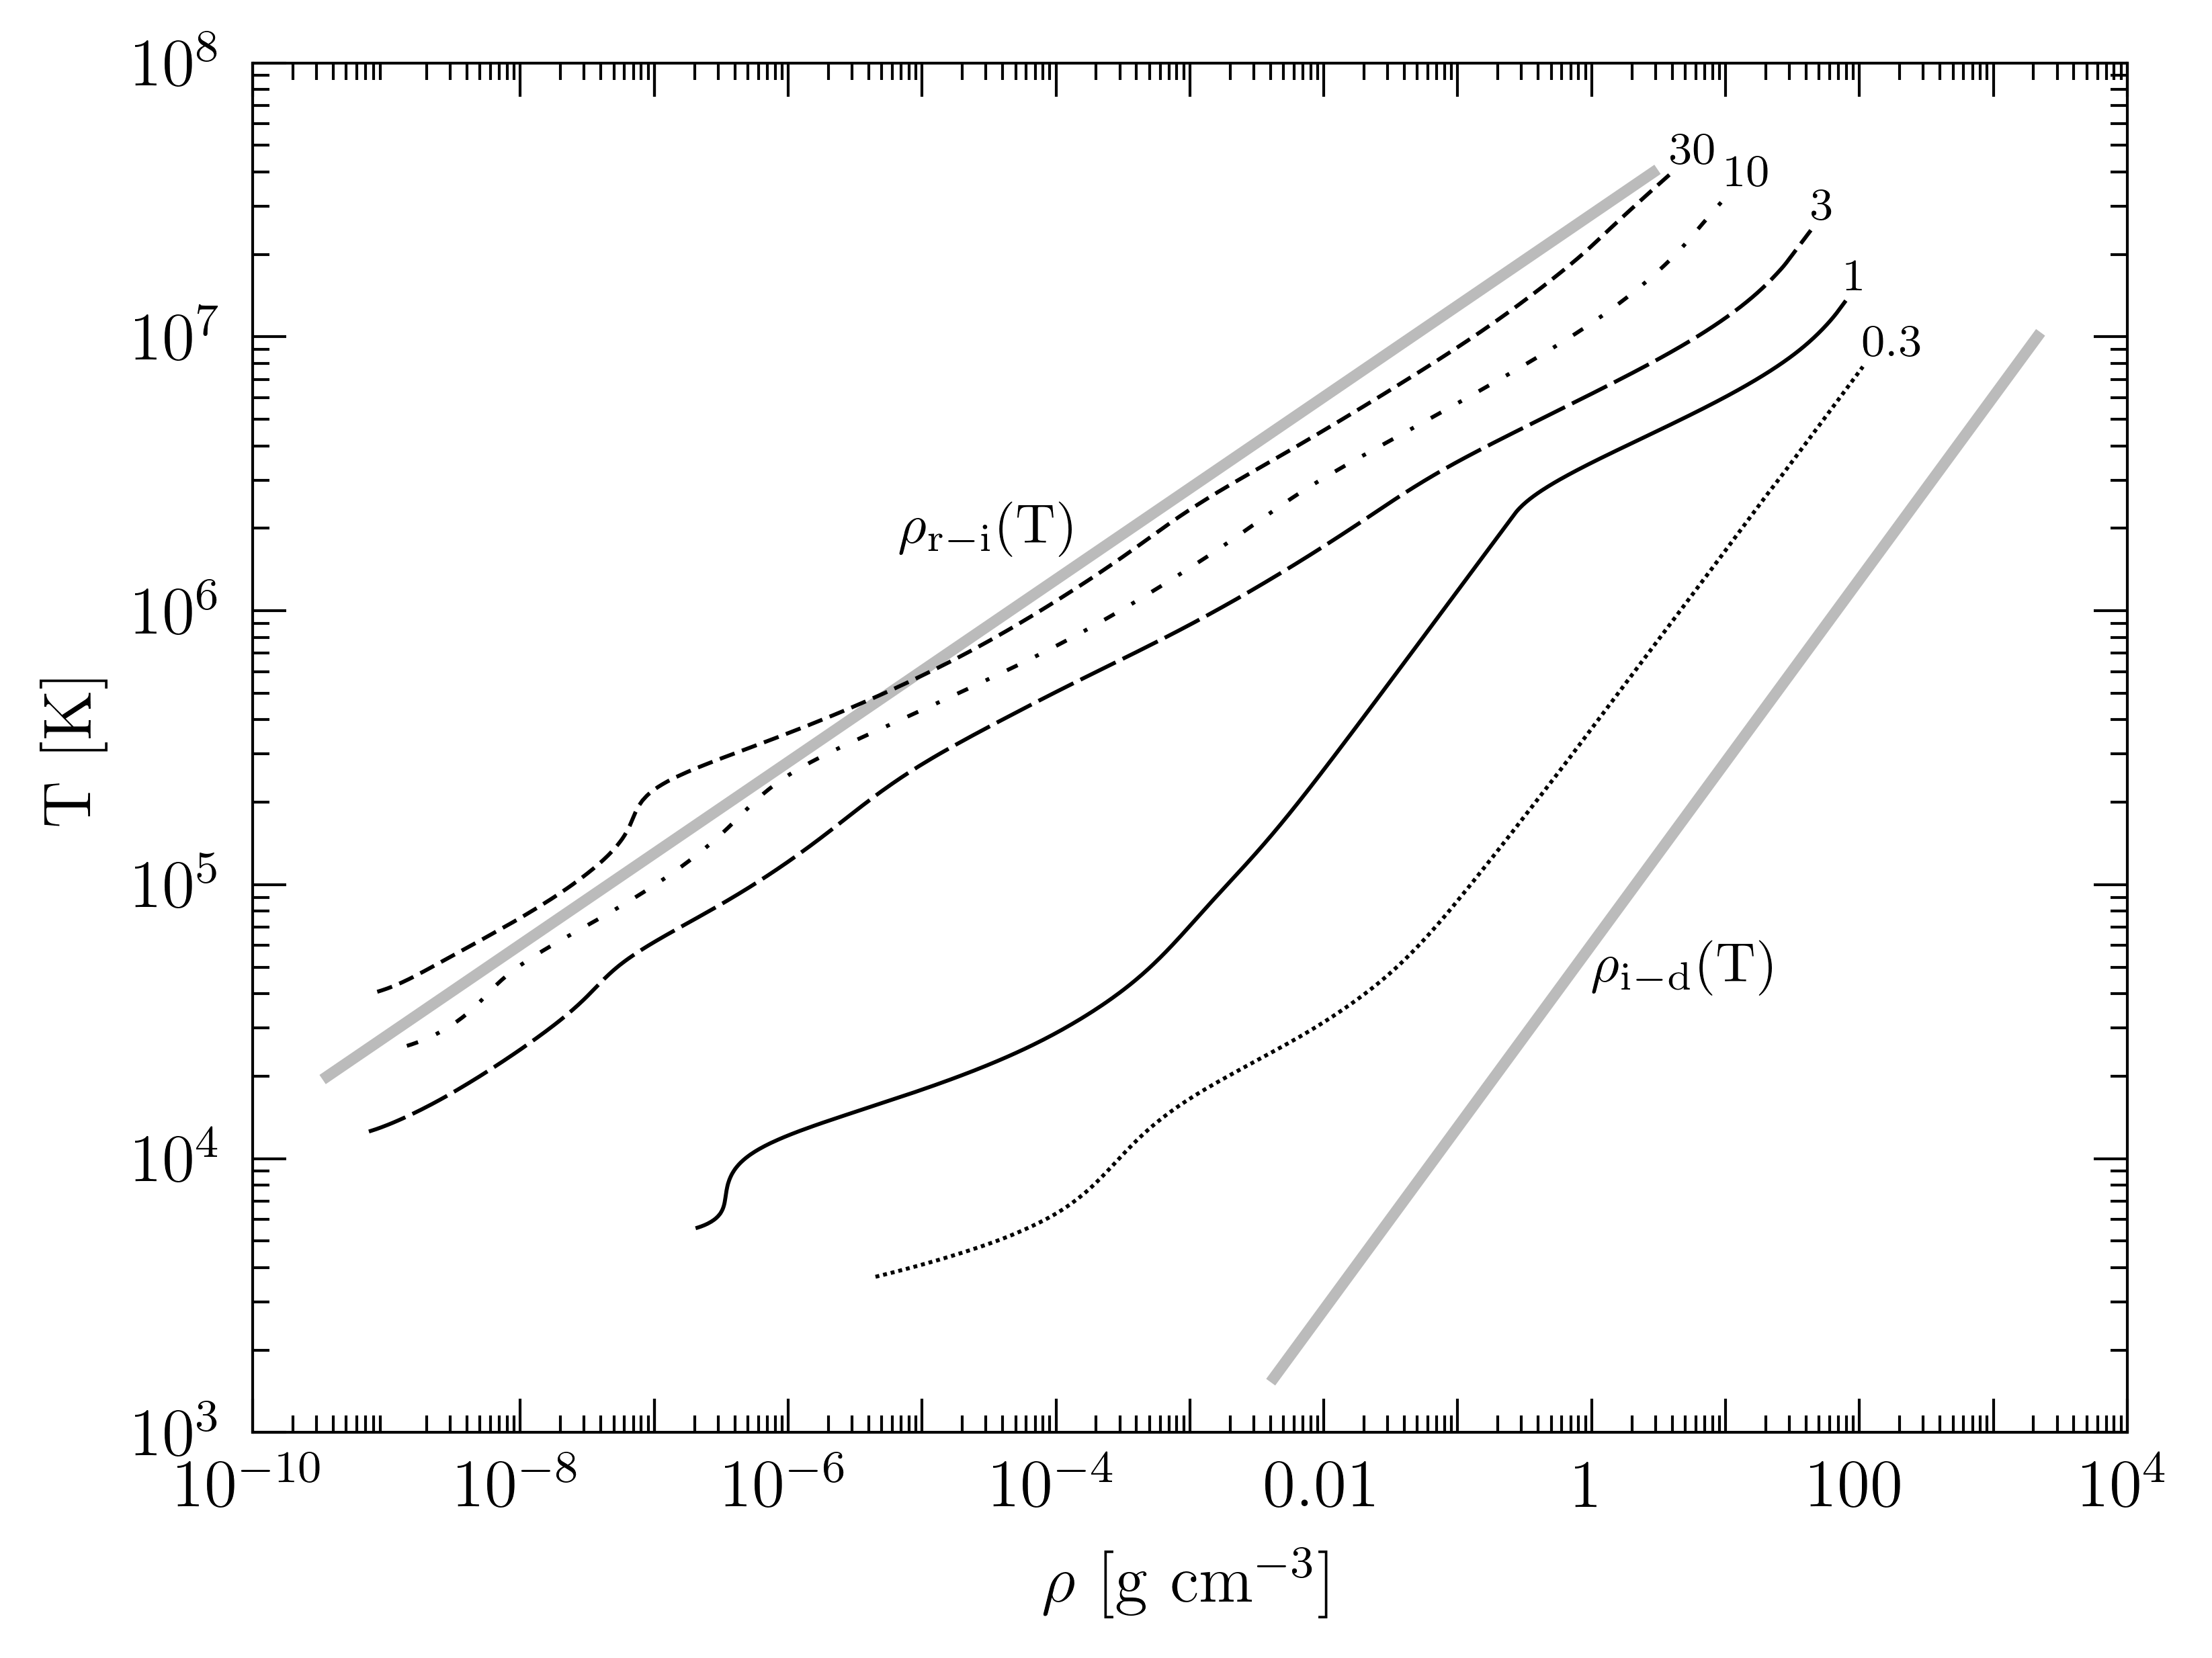

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
rhoMin = 1.0e-10
rhoMax = 1.0e4
tempMin = 1000.
tempMax = 1.0e8

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(rhoMin,rhoMax)
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]',fontsize=axisFontSize)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([1e-10,1e-7,1e-8,1e-7,1e-6,1e-5,1e-4,0.001,0.01,0.1,1,10,100,1000,1e4])
ax.set_xticklabels([r'10$^{-10}$','',r'10$^{-8}$','',r'10$^{-6}$','',r'10$^{-4}$','','0.01',
                    '','1','','100','','10$^4$'])
ax.set_ylim(tempMin,tempMax)
ax.set_ylabel(r'T [K]',fontsize=axisFontSize)
ax.set_yscale('log')

# rho-T plots for the stars of mass M

for i,m in enumerate(massList):
    ax.plot(rho[m],temp[m],ls=lineType[i],color='black',lw=0.7,zorder=10)
    ax.text(rho[m][-1],1.2*temp[m][-1],rf'{m}',fontsize=labelFontSize,ha='left',va='center')

# rho-T boundaries between radiation/gas pressure and gas/degeneracy pressure

ax.plot(rhoRI,tempRI,ls='-',color='#bbbbbb',lw=2,zorder=8)
ax.text(1.5e-4,2e6,r'$\rho_{\rm r-i}$(T)',fontsize=10,ha='right',va='center')
ax.plot(rhoID,tempID,ls='-',color='#bbbbbb',lw=2,zorder=8)
ax.text(1.0,5e4,r'$\rho_{\rm i-d}$(T)',fontsize=10,ha='left',va='center')

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')